## EAC Progression Modeling Publication Notebook 
Goal: To filter micov coverage results into good or bad outcomes  - final draft used for EAC Prog Publication  
Date: 10/25/2024  
Kernal: Python 3

### Imports

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from python_scripts.EAC_prog_model_micov_filter import *

### Functions

In [2]:
def save_pass_fail(pass_, fail_, fn):
    '''Save pass and fail lists for future use'''
    
    pd.DataFrame(pass_, columns=['Pass'])['Pass'].to_csv('micov_results/micov_filtered_lists/PASSmicov_' + fn + '.csv', sep='\t', index=False)
    pd.DataFrame(fail_, columns=['Fail'])['Fail'].to_csv('micov_results/micov_filtered_lists/FAILmicov_' + fn + '.csv', sep='\t', index=False)
    

In [12]:
def sensitivity_specificity(pass_, fail_, biom_df):
    '''Calculates figures out what the specifcity/sensitvity of the micov filter compared with monoculture'''
    
    
    TP = 0
    FP = 0
    for genome_id in pass_:
        
        taxa_name, =  taxa[taxa['GOTU'] == genome_id]['taxa']
        
        if 'g__Staphylococcus' in str(taxa_name):
            TP += 1
        else:
            FP += 1
    
    TN = 0
    FN = 0
    for genome_id in fail_:
        
        taxa_name, =  taxa[taxa['GOTU'] == genome_id]['taxa']
        
        if 'g__Staphylococcus' in str(taxa_name):
            FN += 1
        else:
            TN += 1
    
    total = len(pass_) + len(fail_)
    sensitivity=(TP/(TP+FN))
    specificity=(TN/(TN+FP))
    accuracy = ((TP + TN)/ total)
    precision = (TP / (TP + FP))
    F1 = (2 * ((precision * sensitivity) / (precision + sensitivity)))
    
    print('Sensitivity / Recall / True Positive Rate\t', sensitivity*100, '%')
    print('Specificity / True Negative Rate\t\t', specificity*100, '%')
    print('Accuracy\t\t\t\t\t', accuracy*100, '%')
    print('Precision / Positivie Predictive Value\t\t', precision*100, '%')
    print('F1\t\t\t\t\t\t', F1*100, '%')     

### Publication Datasets

In [2]:
#Set taxa as WOL
taxa = choose_taxa('WOL')

#### EAC ICGC

"Pan-Cancer Analysis of Whole Genomes." Nature, vol. 578, no. 7793, 2020, pp. 82-93,  https://doi.org/10.1038/s41586-020-1969-6. Accessed 17 Jan. 2024.
(Qiita: 14857)

In [4]:
#Import dataset
gen_len = pd.read_csv('micov_results/micov_terminal_results/ICGC_all.coverage', sep='\t')
pos = pd.read_csv('micov_results/micov_terminal_results/ICGC_all.covered_positions', sep='\t')

biom_table = biom.load_table('qiita_downloads/qiita14857_EAC_ICGC/162938_none_WoLr1_scrubbed/feature-table.biom')
biom_df = biom_table.to_dataframe(dense=True)

cov= pd.read_csv('micov_results/micov_terminal_results/ICGC_all_coverage_percentage.txt', sep='\t')
cov = cov.rename(columns={'genome_id': 'GOTU', 'percent_covered':'coverage_percent'})

In [5]:
pass_, fail_ = loop_micov(gen_len, pos, biom_df, cov, taxa)

G000225995 failed
G000333435 failed
G001310795 failed
G001399705 failed


In [6]:
len(fail_)

2646

In [7]:
len(pass_)

1246

In [8]:
save_pass_fail(pass_, fail_, 'ICGC_all')

#### Normal/Healthy & GERD Esoph Brushings  
Deshpande, N. P., Riordan, S. M., Castaño-Rodríguez, N., Wilkins, M. R. & Kaakoush, N. O. Signatures within the esophageal microbiome are associated with host genetics, age, and disease. Microbiome vol. 6 (2018) https://doi.org/10.1186/s40168-018-0611-4

In [9]:
#Import dataset
gen_len = pd.read_csv('micov_results/micov_terminal_results/NormGerd_All.coverage', sep='\t')
pos = pd.read_csv('micov_results/micov_terminal_results/NormGerd_All.covered_positions', sep='\t')

biom_table = biom.load_table('qiita_downloads/qiita14458_NormalGerdEsoph/169125_none_WOL_scrubbed/feature-table.biom')
biom_df = biom_table.to_dataframe(dense=True)

cov= pd.read_csv('micov_results/micov_terminal_results/NormGerd_coverage_percentage.txt', sep='\t')
cov = cov.rename(columns={'genome_id': 'GOTU', 'percent_covered':'coverage_percent'})

In [10]:
pass_, fail_ = loop_micov(gen_len, pos, biom_df, cov, taxa)

In [11]:
len(fail_)

2111

In [12]:
len(pass_)

895

In [13]:
save_pass_fail(pass_, fail_, 'NormGerd')

#### Barrett's Esophgous Progressors/Non Progressors
Paulson, T. G. et al. Somatic whole genome dynamics of precancer in Barrett’s esophagus reveals features associated with disease progression. Nature Communications vol. 13 (2022) https://doi.org/10.1038/s41467-022-29767-7

In [4]:
#Import dataset
gen_len = pd.read_csv('micov_results/micov_terminal_results/BE_all.coverage', sep='\t')
pos = pd.read_csv('micov_results/micov_terminal_results/BE_all.covered_positions', sep='\t')

biom_table = biom.load_table('qiita_downloads/qiita14598_BE_Esoph/149431_genome_WOL_scrubbed/feature-table.biom')
biom_df = biom_table.to_dataframe(dense=True)

cov= pd.read_csv('micov_results/micov_terminal_results/BE_All_coverage_percentage.txt', sep='\t')
cov = cov.rename(columns={'genome_id': 'GOTU', 'percent_covered':'coverage_percent'})

In [5]:
pass_, fail_ = loop_micov(gen_len, pos, biom_df, cov, taxa)

G001310795 failed


In [6]:
len(fail_)

1079

In [7]:
len(pass_)

654

In [8]:
save_pass_fail(pass_, fail_, 'BE_all_T2100_T3100')

#### BE, EAC Tissue
Ross-Innes, C. S. et al. Whole-genome sequencing provides new insights into the clonal architecture of Barrett’s esophagus and esophageal adenocarcinoma. Nature Genetics vol. 47 1038–1046 (2015) https://doi.org/10.1038/ng.3357. This also has normal tissue but we are not using it. 

In [8]:
#Import dataset
gen_len = pd.read_csv('micov_results/micov_terminal_results/Fitz_all.coverage', sep='\t')
pos = pd.read_csv('micov_results/micov_terminal_results/Fitz_all.covered_positions', sep='\t')

biom_table = biom.load_table('qiita_downloads/qiitaTBD_Norm_BE_EAC/genome_WOL_R1_R2_paired_scrubbed/feature-table.biom')
biom_df = biom_table.to_dataframe(dense=True)

cov= pd.read_csv('micov_results/micov_terminal_results/Fitz_all_coverage_percentage.txt', sep='\t')
cov = cov.rename(columns={'genome_id': 'GOTU', 'percent_covered':'coverage_percent'})

In [15]:
pass_, fail_ = loop_micov(gen_len, pos, biom_df, cov, taxa)

G000333435 failed
G001310795 failed
G001399705 failed


In [16]:
len(fail_)

1826

In [17]:
len(pass_)

1101

In [18]:
save_pass_fail(pass_, fail_, 'Fitz_all')

### Monoculture Validation Datasets

In [2]:
#Set taxa as WOL
taxa = choose_taxa('WOL2')

#### 1000 case - WOLr2 Monoculture

In [14]:
#Import micov results
gen_len, pos, biom_df, cov = results_import('1000_WOL2', '1000_WOL2_204090_none.biom')

#Add a 'covered' column since these GOTUs are right (but now it uses a diff one in the script since the other ones above were wrong/corrected)
cov['covered'] = cov['coverage_percent']

In [16]:
pass_, fail_ = loop_micov(gen_len, pos, biom_df, cov, taxa) #, plot=True)

In [ ]:
edge_cases = ['G000010585', 'G000802255', 'G004127505', 'G010078225']
should_be = ['G000171775', 'G000196015', 'G001645185', 'G009982895']

In [ ]:
x = micov_main('G010078225', gen_len, pos, biom_df, cov, taxa, pass_, fail_, plot=True, bin_size=10000)

In [ ]:
loop_list(pass_, biom_df)

In [ ]:
loop_list(fail_, biom_df)

In [17]:
sensitivity_specificity(pass_, fail_, biom_df)

Sensitivity / Recall / True Positive Rate	 87.8048780487805 %
Specificity / True Negative Rate		 95.18072289156626 %
Accuracy					 94.36997319034852 %
Precision / Positivie Predictive Value		 69.23076923076923 %
F1						 77.41935483870967 %


#### 50 case - WOLr2 Monoculture

In [3]:
#Import micov results
gen_len_50, pos_50, biom_df_50, cov_50 = results_import('50_WOL2', '50_WOL2_204093_none.biom')

#Add a 'covered' column since these GOTUs are right (but now it uses a diff one in the script since the other ones above were wrong/corrected)
cov_50['covered'] = cov_50['coverage_percent']

In [ ]:
edge_case=[]
should_pass=['G000802255', 'G009982895']

,genome_id,start,stop,sample_id,hit_index_list,hit_start_stop_list
747,G009982895,1023815,1023965,15642.11919.VN24B10,[102],"[[1020000, 1030000]]"
1956,G009982895,4497826,4497976,15642.11919.NC.Staphy1.10E,[449],"[[4490000, 4500000]]"
2827,G009982895,2440773,2440923,15642.11919.NC.Staphy1.6D,[244],"[[2440000, 2450000]]"
3303,G009982895,1025225,1025375,15642.11919.NC.Staphy2.5B,[102],"[[1020000, 1030000]]"
3765,G009982895,2617768,2617918,15642.11919.VN13B11,[261],"[[2610000, 2620000]]"
...,...,...,...,...,...,...
52587,G009982895,718541,718825,15642.11919.niams9.NL.5,[71],"[[710000, 720000]]"
52588,G009982895,1799244,1799394,15642.11919.niams9.NL.5,[179],"[[1790000, 1800000]]"
54158,G009982895,1799222,1799372,15642.11919.niams9.NL.10,[179],"[[1790000, 1800000]]"
54462,G009982895,924510,924660,15642.11919.niams9.L.8,[92],"[[920000, 930000]]"


,bin_start,bin_stop,sample_hits,read_hits,num_samples,prior_bin_stop,is_connected
0,170000,180000,"{15642.11919.niams13.NL.6, 15642.11919.niams18...",3,3,NaN,False
1,180000,190000,"{15642.11919.niams9.NL.4, 15642.11919.niams28....",4,4,180000.0,True
2,320000,330000,"{15642.11919.niams13.L.3, 15642.11919.niams6.L...",4,4,190000.0,False
3,460000,470000,"{15642.11919.niams6.L.5, 15642.11919.niams13.L...",12,11,330000.0,False
4,590000,600000,"{15642.11919.niams14.NL.9, 15642.11919.niams28...",3,3,470000.0,False
5,710000,720000,"{15642.11919.niams13.NL.9, 15642.11919.niams9....",2,2,600000.0,False
6,720000,730000,"{15642.11919.niams13.NL.7, 15642.11919.niams6....",3,3,720000.0,True
7,820000,830000,"{15642.11919.niams14.L.1, 15642.11919.niams18....",5,5,730000.0,False
8,920000,930000,"{15642.11919.niams28.L.10, 15642.11919.NC.Stap...",7,7,830000.0,False
9,1020000,1030000,"{15642.11919.niams6.NL.3, 15642.11919.niams28....",12,12,930000.0,False


,index,bin_group,samples,sample_counts,read_counts
0,27,"[[4490000, 4500000]]","{15642.11919.niams6.L.9, 15642.11919.NC.Staphy...",12,12
1,7,"[[1020000, 1030000]]","{15642.11919.niams6.NL.3, 15642.11919.niams28....",12,12
2,2,"[[460000, 470000]]","{15642.11919.niams6.L.5, 15642.11919.niams13.L...",11,12
3,12,"[[1790000, 1800000], [1800000, 1810000]]","{15642.11919.niams28.NL.3, 15642.11919.niams28...",8,8
4,6,"[[920000, 930000]]","{15642.11919.niams28.L.10, 15642.11919.NC.Stap...",7,7
5,0,"[[170000, 180000], [180000, 190000]]","{15642.11919.niams6.NL.6, 15642.11919.niams28....",7,7
6,14,"[[1910000, 1920000]]","{15642.11919.niams14.L.8, 15642.11919.niams30....",6,6
7,23,"[[2640000, 2650000]]","{15642.11919.niams6.NL.5, 15642.11919.niams9.L...",6,7
8,22,"[[2610000, 2620000]]","{15642.11919.niams28.NL.4, 15642.11919.VN13B11...",6,6
9,4,"[[710000, 720000], [720000, 730000]]","{15642.11919.niams13.NL.7, 15642.11919.niams6....",5,5


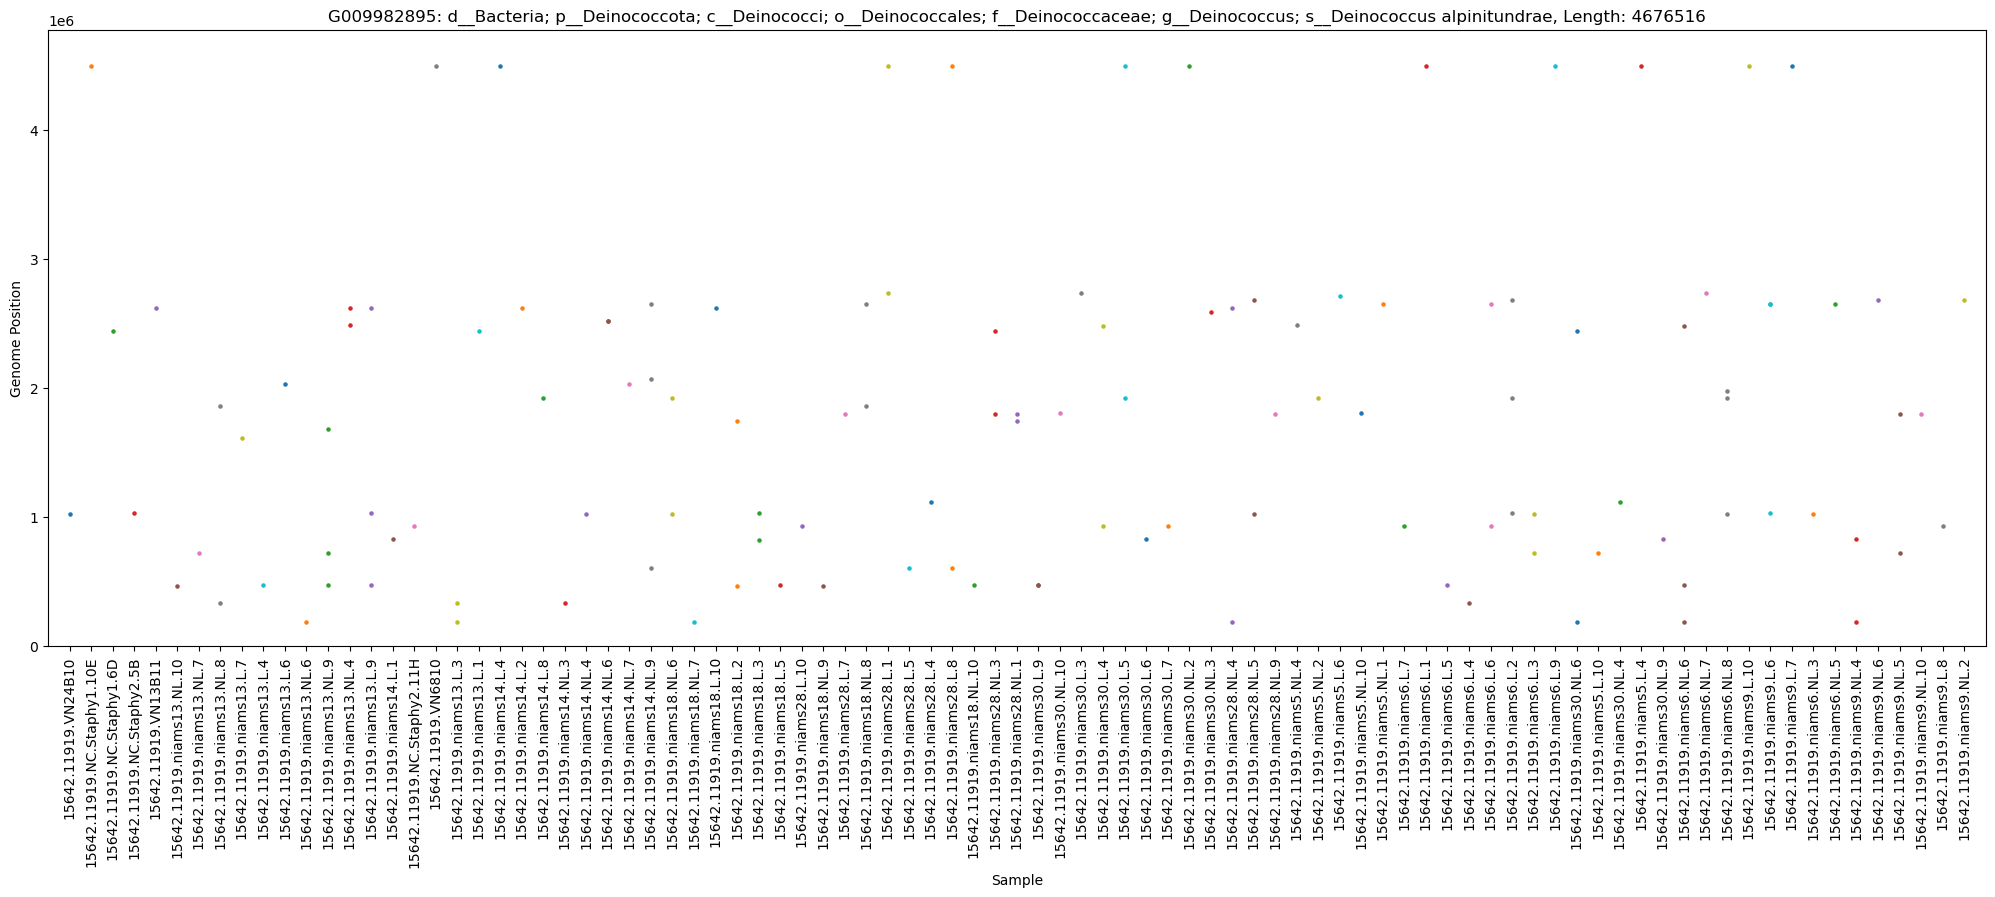

In [13]:
x = micov_main('G009982895', gen_len_50, pos_50, biom_df_50, cov_50, taxa, [], [], plot=True, bin_size=10000)

In [4]:
pass_50, fail_50 = loop_micov(gen_len_50, pos_50, biom_df_50, cov_50, taxa) #, plot=True)

In [ ]:
loop_list(pass_50, biom_df_50)

In [ ]:
loop_list(fail_50, biom_df_50)

In [13]:
sensitivity_specificity(pass_50, fail_50, biom_df_50)

Sensitivity / Recall / True Positive Rate	 38.095238095238095 %
Specificity / True Negative Rate		 96.1038961038961 %
Accuracy					 83.6734693877551 %
Precision / Positivie Predictive Value		 72.72727272727273 %
F1						 50.0 %
